# ***의료보험 비용 데이터를 통한 분석***

## 신체적, 지리적, 사회적 여건에 따라 어떻게 발생하는지 분석

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 경고 메세지 무시하기

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/insurance.csv")

In [4]:
data.shape

(1338, 7)

In [5]:
# charges : 보험료
# region : 피보험자가 사는 지역
# children : 부양하는 아이 숫자 ? 무슨 칼럼인지 잘 모르겠음.

In [6]:
from IPython.display import Image

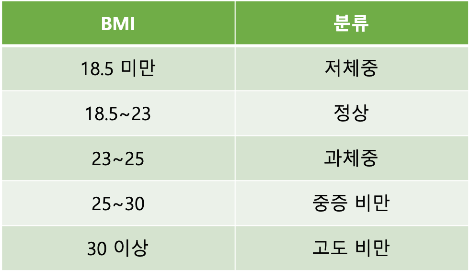

In [13]:
# bmi 치수 기준표

Image("C:/Users/joyh1/Desktop/GitRepo/data/bmi.png")

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### - 성별에 따른 의료보험 요금에 대해 분석해보자

In [16]:
# groupby를 이용해 성별에 따른 의료보험 비용 평균값을 나타내보자
sex_charge =data.groupby(['sex'])['charges'].mean()

In [17]:
# pd.DataFrame을 이용해서 성별에 따른 의료보험 요금 평균을 데이터프레임으로 만들고 ggplot을 이용해 bar 그래프로 나타내기
import matplotlib.pyplot as plt
from plotnine import * 
plt.rc("font",family="Malgun Gothic")

In [19]:
df_sex_charge = pd.DataFrame(sex_charge).reset_index()
df_sex_charge.columns = ['성별', '평균비용']
df_sex_charge

,성별,평균비용
0,female,12569.578844
1,male,13956.751178


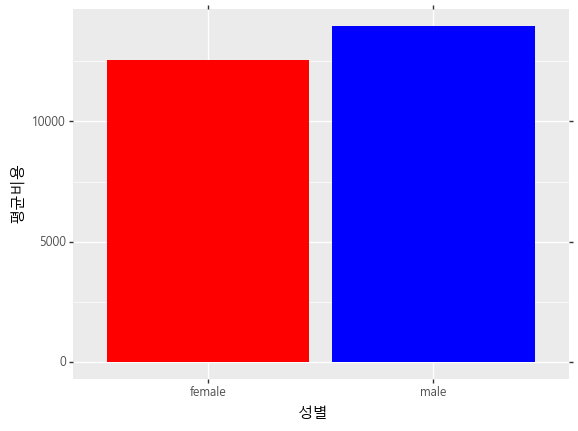

<ggplot: (-9223371925204397894)>

In [20]:
(ggplot(df_sex_charge)
 +aes(x='성별', y='평균비용')                    # 성별로 색깔 다르게 하기
 +geom_bar(stat='identity', position='dodge', fill=('red','blue'))
 +theme(text=element_text(family="Malgun Gothic"))
)

In [21]:
# 다른 분석을 해보기 위해 데이터 다시 살펴보기
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Bmi 기준에 따른 보험 평균비용 분석

In [22]:
# bmi 기준표를 기준으로 data속 bim 수치를 저체중~고도비만 별로 나누어 분류해보자

# 새로운 비만정도 칼럼 추가
data['비만정도'] = ""

In [23]:
data.loc[data['bmi'] < 18.5, '비만정도'] = '저체중'
data.loc[(data['bmi'] > 18.5) & (data['bmi'] < 23), '비만정도'] = '정상'
data.loc[(data['bmi'] >= 23) & (data['bmi'] < 25), '비만정도'] = '과체중'
data.loc[(data['bmi'] >= 25) & (data['bmi'] < 30), '비만정도'] = '중증비만'
data.loc[data['bmi'] >= 30, '비만정도'] = '고도비만'

In [24]:
data.head()

,age,sex,bmi,children,smoker,region,charges,비만정도
0,19,female,27.900,0,yes,southwest,16884.92400,중증비만
1,18,male,33.770,1,no,southeast,1725.55230,고도비만
2,28,male,33.000,3,no,southeast,4449.46200,고도비만
3,33,male,22.705,0,no,northwest,21984.47061,정상
4,32,male,28.880,0,no,northwest,3866.85520,중증비만


In [25]:
# seaborn을 이용하기
import seaborn as sns

In [28]:
## 잠시 Raw data의 칼럼을 모두 한국어로 바꿔주자
data.columns = ['나이','성별','bmi','자녀수','흡연여부','거주지역','보험비용','비만정도']
data.head()

,나이,성별,bmi,자녀수,흡연여부,거주지역,보험비용,비만정도
0,19,female,27.900,0,yes,southwest,16884.92400,중증비만
1,18,male,33.770,1,no,southeast,1725.55230,고도비만
2,28,male,33.000,3,no,southeast,4449.46200,고도비만
3,33,male,22.705,0,no,northwest,21984.47061,정상
4,32,male,28.880,0,no,northwest,3866.85520,중증비만


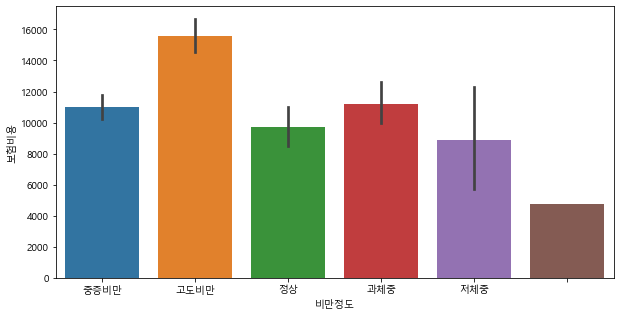

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(data=data, x='비만정도', y='보험비용')

# 고도비만 > 중증비만 > 과체중 > 정상 > 저체중 순서
# 고도비만 일수록 질병이 더 발생함에 따라 의료보험 비용이 가장 높은 것으로 나타내진다. 
# 그리고 중증비만과 과체중 거의 비슷함 
# 저체중으로 인한 의료보험 비용이 젤 낮은걸로 나옴

# 따라서 저체중 보다는 비만으로 인한 성인병같은 질병이 의료보험 비용을 높일 것으로 추측


In [83]:
data.isnull().sum()

나이      0
성별      0
bmi     0
자녀수     0
흡연여부    0
거주지역    0
보험비용    0
비만정도    0
연령대     0
dtype: int64

## 나이에 따른 보험비용 분석

In [30]:
# 나이를 범주화 하기 위해서 나이 value의 최소, 최댓값을 구하고 범위 기준을 세워보자
data['나이'].min()

18

In [31]:
data['나이'].max()

64

In [32]:
# 최소연령이 18세, 최대연령이 64세이므로 8살씩 차이로 끊어서 분류해보자
# 18세이상 25세이하 / 26세이상 33세이하 / 34세이상 41세이하 / 42세이상 49세이하/ 50세이상 57세이하 / 58세이상 64세이하

In [33]:
data['연령대'] = ''

In [34]:
data.loc[(data['나이'] >= 18) & (data['나이'] < 26), '연령대'] = '18세이상 25세이하'
data.loc[(data['나이'] >= 26) & (data['나이'] < 34), '연령대'] = '26세이상 33세이하'
data.loc[(data['나이'] >= 34) & (data['나이'] < 42), '연령대'] = '34세이상 41세이하'
data.loc[(data['나이'] >= 42) & (data['나이'] < 50), '연령대'] = '42세이상 49세이하'
data.loc[(data['나이'] >= 50) & (data['나이'] < 58), '연령대'] = '50세이상 57세이하'
data.loc[(data['나이'] >= 58) & (data['나이'] < 64), '연령대'] = '58세이상 64세이하'
data.loc[data['나이'] >= 64, '연령대'] = '64세이상'

In [35]:
data.head()

,나이,성별,bmi,자녀수,흡연여부,거주지역,보험비용,비만정도,연령대
0,19,female,27.900,0,yes,southwest,16884.92400,중증비만,18세이상 25세이하
1,18,male,33.770,1,no,southeast,1725.55230,고도비만,18세이상 25세이하
2,28,male,33.000,3,no,southeast,4449.46200,고도비만,26세이상 33세이하
3,33,male,22.705,0,no,northwest,21984.47061,정상,26세이상 33세이하
4,32,male,28.880,0,no,northwest,3866.85520,중증비만,26세이상 33세이하


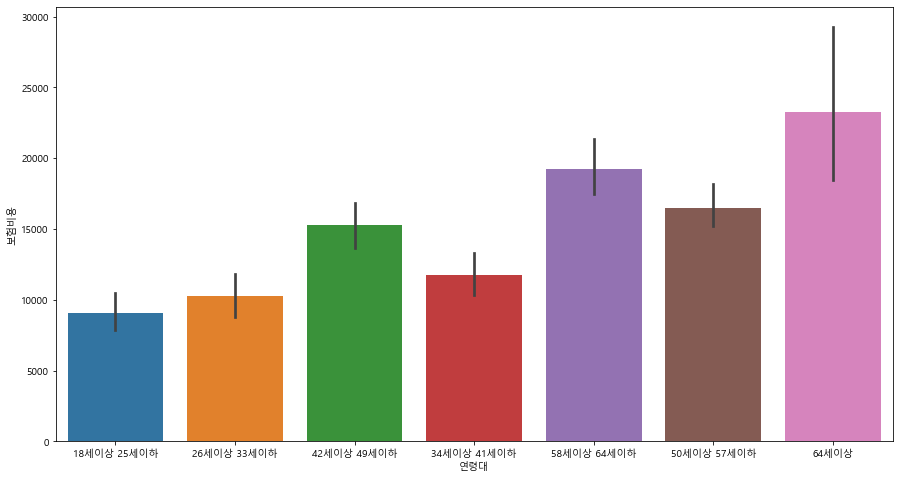

In [36]:
plt.figure(figsize=(15,8))
sns.barplot(data=data, x='연령대', y='보험비용')

# 나이가 고령자로 갈수록 의료보험 비용이 높아진다. 
# 반대로 의료보험 비용이 가장 낮은 연령은 18세이상 25세 이하로 가장 어린 연령대이다.

In [37]:
data.head()

,나이,성별,bmi,자녀수,흡연여부,거주지역,보험비용,비만정도,연령대
0,19,female,27.900,0,yes,southwest,16884.92400,중증비만,18세이상 25세이하
1,18,male,33.770,1,no,southeast,1725.55230,고도비만,18세이상 25세이하
2,28,male,33.000,3,no,southeast,4449.46200,고도비만,26세이상 33세이하
3,33,male,22.705,0,no,northwest,21984.47061,정상,26세이상 33세이하
4,32,male,28.880,0,no,northwest,3866.85520,중증비만,26세이상 33세이하


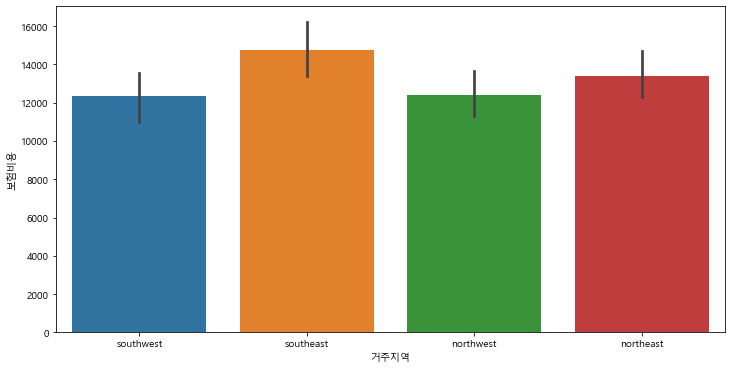

In [39]:
# 거주지역에 따른 보험비용 평균값을 비교해보자
plt.figure(figsize=(12,6))
sns.barplot(data=data, x='거주지역', y='보험비용')

# 크게 차이 나지 않는다. 지역은 보험비용에 많은 영향을 주진 않는다.

In [40]:
data.head()

,나이,성별,bmi,자녀수,흡연여부,거주지역,보험비용,비만정도,연령대
0,19,female,27.900,0,yes,southwest,16884.92400,중증비만,18세이상 25세이하
1,18,male,33.770,1,no,southeast,1725.55230,고도비만,18세이상 25세이하
2,28,male,33.000,3,no,southeast,4449.46200,고도비만,26세이상 33세이하
3,33,male,22.705,0,no,northwest,21984.47061,정상,26세이상 33세이하
4,32,male,28.880,0,no,northwest,3866.85520,중증비만,26세이상 33세이하


<Figure size 1080x432 with 0 Axes>

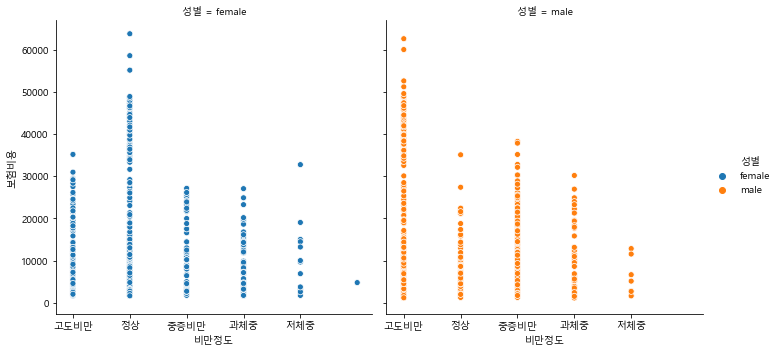

In [49]:
# 비만정도와 성별에 따른 보험비용 얼마나 소비하는지 나타내기

plt.figure(figsize=(15,6))
sns.relplot(data=data, x='비만정도', y='보험비용', col='성별', hue='성별')

In [51]:
# lmplot은 점으로 분포도와 선형관계도 그려줌
# lmplot은 x축, y축이 모두 수치형으로 이루어져야 할거 같다

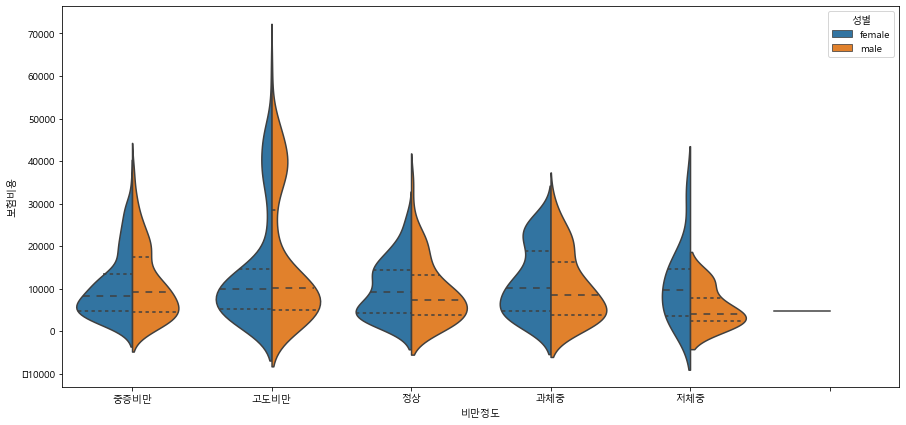

In [76]:
# 비만정도와 성별에 따른 보험비용을 violinplot으로 그려보기

plt.figure(figsize=(15,7))                                  # split옵션으로 하나의 violin2개로 나누기/ inner="quart"로 4분위 숫자 입력
sns.violinplot(data=data, x='비만정도', y='보험비용', hue='성별', split=True, inner="quart")

In [61]:
data.head()

,나이,성별,bmi,자녀수,흡연여부,거주지역,보험비용,비만정도,연령대
0,19,female,27.900,0,yes,southwest,16884.92400,중증비만,18세이상 25세이하
1,18,male,33.770,1,no,southeast,1725.55230,고도비만,18세이상 25세이하
2,28,male,33.000,3,no,southeast,4449.46200,고도비만,26세이상 33세이하
3,33,male,22.705,0,no,northwest,21984.47061,정상,26세이상 33세이하
4,32,male,28.880,0,no,northwest,3866.85520,중증비만,26세이상 33세이하


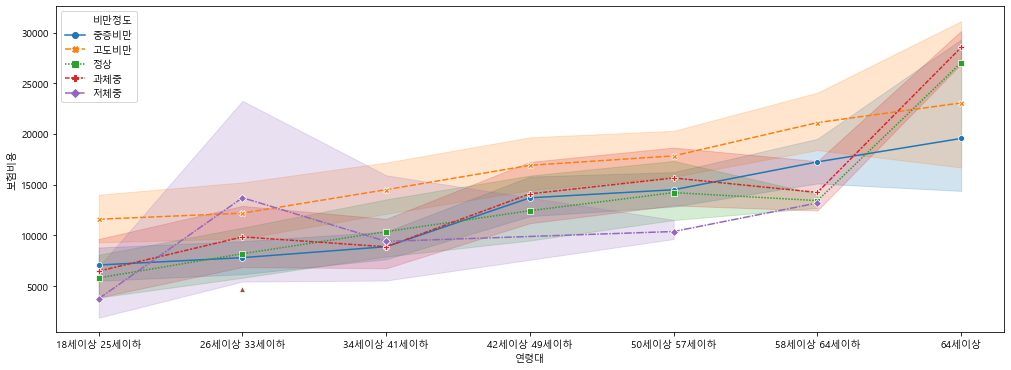

In [69]:
# 비만정도, 연령대에 따른 보험비용 나타내보기
# lineplot 이용
plt.figure(figsize=(17,6))                                      # legend에 있는 값을 style로 넣고 markers옵션을 넣어 선 구분 명확화
sns.lineplot(data=data, x='연령대', y='보험비용', hue='비만정도', markers=True, style='비만정도')
            #err_style='bars' 로 신뢰구간(투명한구간) bars형태로 수정 가능

# 전체적으로 나이가 많을수록 보험비용이 올라간다.
# 단 26~33세 구간에서 저체중의 보험비용이 급작스럽게 올라간다.
# 저체중은 57세까지만 존재하고 그 이후로는 저체중인 사람이 존재하지 않는다.


In [79]:
data.head()

,나이,성별,bmi,자녀수,흡연여부,거주지역,보험비용,비만정도,연령대
0,19,female,27.900,0,yes,southwest,16884.92400,중증비만,18세이상 25세이하
1,18,male,33.770,1,no,southeast,1725.55230,고도비만,18세이상 25세이하
2,28,male,33.000,3,no,southeast,4449.46200,고도비만,26세이상 33세이하
3,33,male,22.705,0,no,northwest,21984.47061,정상,26세이상 33세이하
4,32,male,28.880,0,no,northwest,3866.85520,중증비만,26세이상 33세이하


In [91]:
# 거주지역별로 어떤 연령대가 많고 적은지 살펴보자

df_location = pd.DataFrame(data.groupby(['거주지역','연령대'])['나이'].count())
df_location = df_location.reset_index()
df_location.rename(columns={'나이':'인원'}, inplace=True)
df_location.head()

,거주지역,연령대,인원
0,northeast,18세이상 25세이하,73
1,northeast,26세이상 33세이하,51
2,northeast,34세이상 41세이하,51
3,northeast,42세이상 49세이하,55
4,northeast,50세이상 57세이하,55


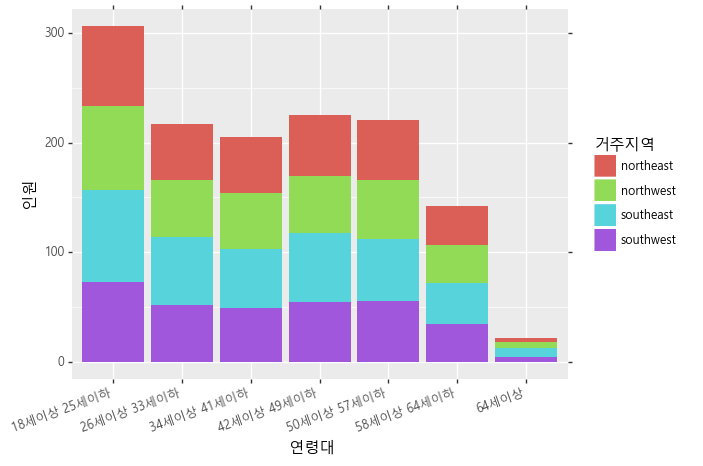

<ggplot: (-9223371925197447669)>

In [100]:
(ggplot(df_location)
 +aes(x='연령대', y='인원', fill='거주지역')
 +geom_bar(stat='identity')                           # ggplot에서 x축 label 각도 이동하는법
 +theme(text=element_text(family='Malgun Gothic'), axis_text_x = element_text(angle=20, hjust=1))
)

In [101]:
data.head()

,나이,성별,bmi,자녀수,흡연여부,거주지역,보험비용,비만정도,연령대
0,19,female,27.900,0,yes,southwest,16884.92400,중증비만,18세이상 25세이하
1,18,male,33.770,1,no,southeast,1725.55230,고도비만,18세이상 25세이하
2,28,male,33.000,3,no,southeast,4449.46200,고도비만,26세이상 33세이하
3,33,male,22.705,0,no,northwest,21984.47061,정상,26세이상 33세이하
4,32,male,28.880,0,no,northwest,3866.85520,중증비만,26세이상 33세이하


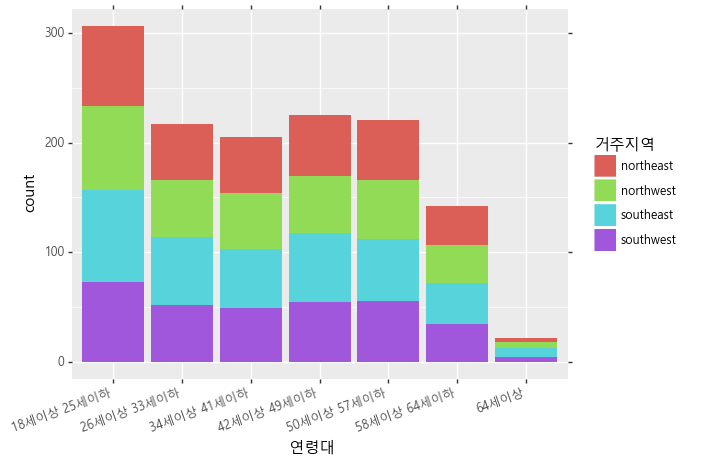

<ggplot: (-9223371925198542041)>

In [103]:
(ggplot(data)     # fill= lengend에 들어갈 값
 +aes(x='연령대', fill='거주지역')
 +geom_bar(stat='count') # 여기서 count를 하면 거주지역별로 연령대별로 각각 세어준다.
 +theme(text=element_text(family="Malgun Gothic"), axis_text_x=element_text(angle=20, hjust=1))
)
 

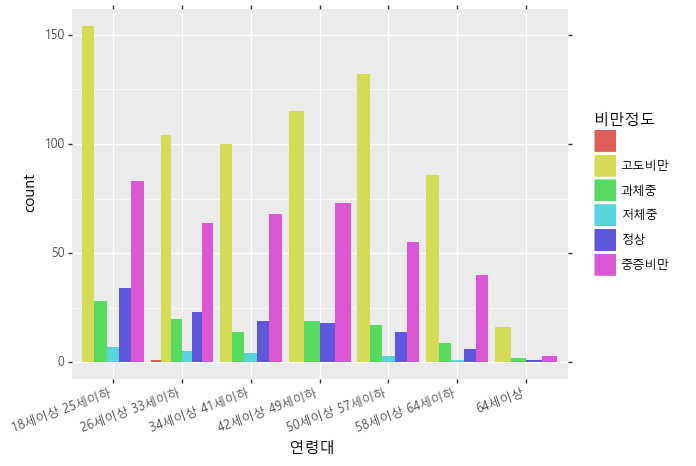

<ggplot: (111661024895)>

In [129]:
# 연령대별로 비만정도가 얼마나 존재하는지 살펴보자 
# ggplot graph size크기 조정 라이브러리
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = "14, 10"

(ggplot(data)     # fill= lengend에 들어갈 값
 +aes(x='연령대', fill='비만정도')
 +geom_bar(stat='count', position='dodge') # 여기서 count를 하면 비만정도에따라 연령대별로 각각 세어준다.
 +theme(text=element_text(family="Malgun Gothic"), axis_text_x=element_text(angle=20, hjust=1))
)
# Legend의 빨간색 네모칸 범주는 아무것도 없는 거임 

In [112]:
# 흡연여부에 따른 보험비용 평균비용을 살펴보자

df_smoke = pd.DataFrame(data.groupby(['흡연여부'])['보험비용'].mean())
df_smoke = df_smoke.reset_index()
df_smoke.columns = ['흡연여부', '보험평균비용']
df_smoke

,흡연여부,보험평균비용
0,no,8434.268298
1,yes,32050.231832


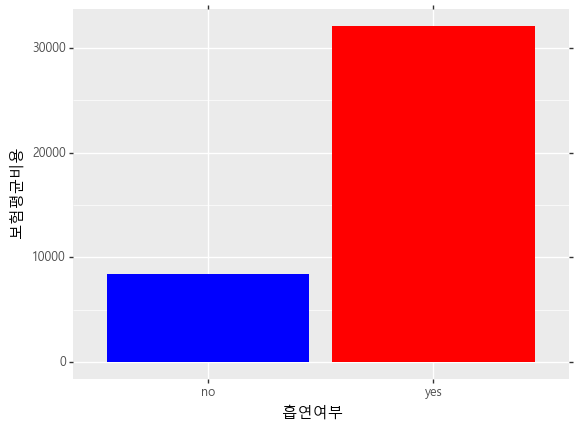

<ggplot: (111658937727)>

In [114]:
(ggplot(df_smoke)
 +aes(x='흡연여부', y='보험평균비용')
 +geom_bar(stat='identity', position='dodge', fill=('blue','red'))
 +theme(text=element_text(family='Malgun Gothic'))
)

# 흡연여부는 보험평균비용에 상당한 영향을 미친다.

In [115]:
data.head()

,나이,성별,bmi,자녀수,흡연여부,거주지역,보험비용,비만정도,연령대
0,19,female,27.900,0,yes,southwest,16884.92400,중증비만,18세이상 25세이하
1,18,male,33.770,1,no,southeast,1725.55230,고도비만,18세이상 25세이하
2,28,male,33.000,3,no,southeast,4449.46200,고도비만,26세이상 33세이하
3,33,male,22.705,0,no,northwest,21984.47061,정상,26세이상 33세이하
4,32,male,28.880,0,no,northwest,3866.85520,중증비만,26세이상 33세이하


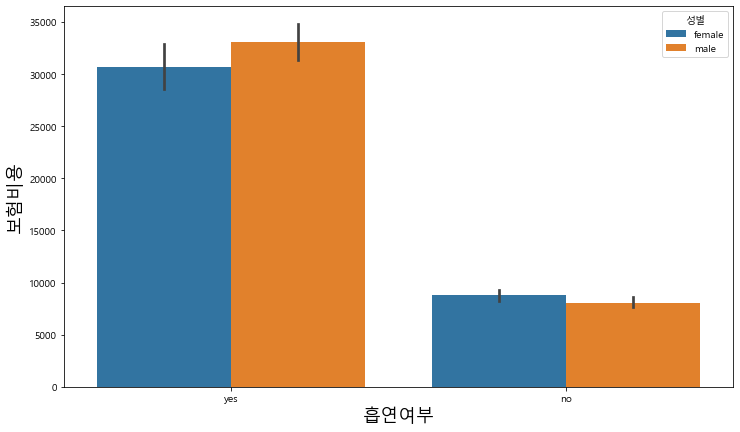

In [123]:
# 흡연과 성별에 따른 보험비용의 평균값을 알아보자.

plt.figure(figsize=(12,7))
plt.xlabel('흡연여부', fontsize=18)
plt.ylabel('보험비용', fontsize=18)
sns.barplot(data=data, x='흡연여부', y='보험비용', hue='성별')